In [2]:
from matplotlib import pyplot as plt
def print_image(img) :
    plt.imshow(img)
    plt.show()

In [3]:

import tensorflow as tf
import numpy as np
import pandas as pd


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-05-18 03:56:45.248698: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-18 03:56:45.304467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:45.312853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:45.313676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

True

ysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:45.941875: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:45.942264: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 4630 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [5]:
tf.config.list_physical_devices('GPU')

2022-05-18 03:56:46.001045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:46.001549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:46.001827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
X_train = np.load('../dataset/Augmenteddata/X_train.npy')
y_train = np.load('../dataset/Augmenteddata/y_train.npy')
X_test = np.load('../dataset/Augmenteddata/X_test.npy')
y_test = np.load('../dataset/Augmenteddata/y_test.npy')
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
X_test[0].shape


(28, 28, 3)

In [8]:
np.random.seed(0)
np.random.shuffle(X_train)
np.random.seed(0)
np.random.shuffle(y_train)
np.random.seed(0)
np.random.shuffle(X_test)
np.random.seed(0)
np.random.shuffle(y_test)

In [9]:
with tf.device('/gpu'):
  X_train_tensor = tf.constant(X_train,dtype='float32')
  X_test_tensor = tf.constant(X_test,dtype='float32')

  y_train_tensor = tf.constant(y_train,dtype='float32')
  y_test_tensor = tf.constant(y_test,dtype='float32')

2022-05-18 03:56:51.158350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:51.159363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:51.159911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:51.160357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 03:56:51.160731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [10]:
print(X_train_tensor.shape)
print(X_test_tensor.shape)

(345000, 28, 28, 3)
(15000, 28, 28, 3)


3
6
5
0
8
6
4
2


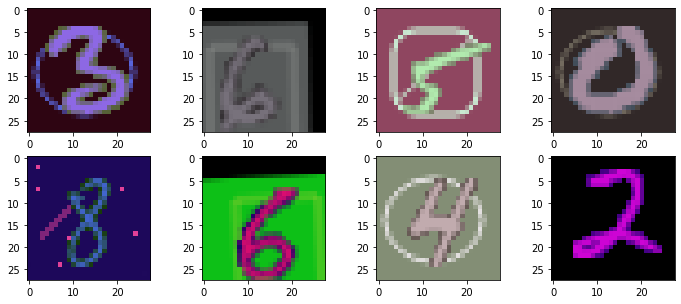

In [11]:
import matplotlib.pyplot as plt 
import random
plt.figure(figsize = (12,5))
for i in range(8):
  plt.subplot(240+1+i)
  plt.imshow(X_train[i+340000])
  print(y_train[i+340000])
  


8
5
1
2
6
3
8
3


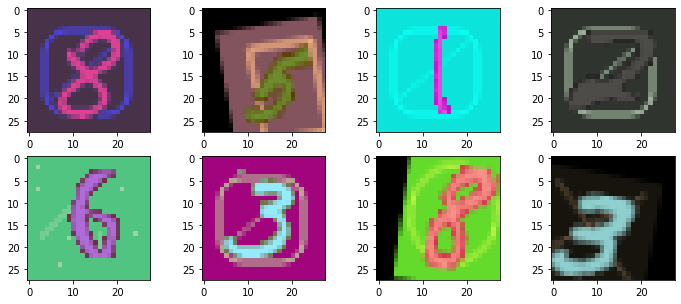

In [12]:
import matplotlib.pyplot as plt 
import random
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])
  print(y_train[ind])
  


In [13]:
from tensorflow.keras.utils import to_categorical


def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = tf.reshape(X_train,shape = (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))
  X_test = tf.reshape(X_test,shape = (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))
  # X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
  # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
  
  # # convert image values from integers to floats
  # X_train = X_train.astype('float32')
  # X_test = X_test.astype('float32')
  
  # # normalization
  # X_train /= 255.0
  # X_test/= 255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
# metrics 
from keras.metrics import categorical_crossentropy
# optimization method


def LeNet():
  model = Sequential()
  
  # Convolutional layer  
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,3)))
  
  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Convolutional layer 
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
  # Max-pooling layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Flatten layer 
  model.add(Flatten())
  
  # The first fully connected layer 
  model.add(Dense(120, activation = 'relu'))
  
  # The output layer  
  model.add(Dense(10, activation = 'softmax'))
  
  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy, 
  # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 
    # to optimize the loss function
  # metric: accuracy 
  
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return model

In [15]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [17]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

/home/krex/anaconda3/envs/krex_3.9/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

def summary_loss(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['loss'], color = 'blue', label = 'train')
  plt.plot(history.history['val_loss'], color = 'red', label = 'val')
  plt.legend()
  plt.title('loss')
  plt.show()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  
  
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1,
                      callbacks = [callback])
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)
  summary_loss(history)

2022-05-18 01:29:07.370195: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3245760000 exceeds 10% of free system memory.


Epoch 1/50


2022-05-18 01:29:10.167528: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


2695/2695 [==============================] - 24s 8ms/step - loss: 1.5886 - accuracy: 0.4762 - val_loss: 1.0531 - val_accuracy: 0.6657
Epoch 2/50
2695/2695 [==============================] - 22s 8ms/step - loss: 0.9081 - accuracy: 0.7112 - val_loss: 0.7837 - val_accuracy: 0.7494
Epoch 3/50
2695/2695 [==============================] - 22s 8ms/step - loss: 0.7078 - accuracy: 0.7765 - val_loss: 0.6284 - val_accuracy: 0.8003
Epoch 4/50
2695/2695 [==============================] - 22s 8ms/step - loss: 0.6079 - accuracy: 0.8089 - val_loss: 0.5713 - val_accuracy: 0.8201
Epoch 5/50
2695/2695 [==============================] - 22s 8ms/step - loss: 0.5444 - accuracy: 0.8283 - val_loss: 0.5156 - val_accuracy: 0.8351
Epoch 6/50
2695/2695 [==============================] - 22s 8ms/step - loss: 0.4979 - accuracy: 0.8430 - val_loss: 0.4661 - val_accuracy: 0.8514
Epoch 7/50
2695/2695 [==============================] - 22s 8ms/step - loss: 0.4617 - accuracy: 0.8541 - val_loss: 0.4302 - val_accuracy: 0.8

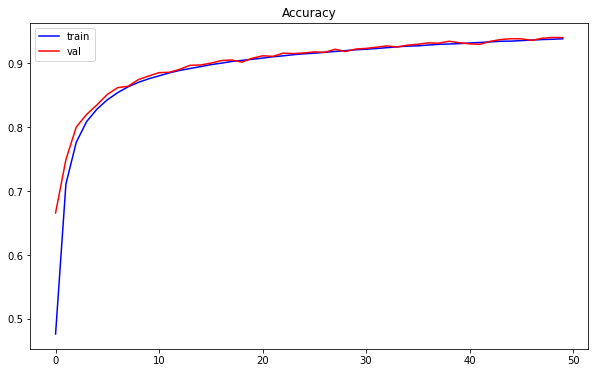

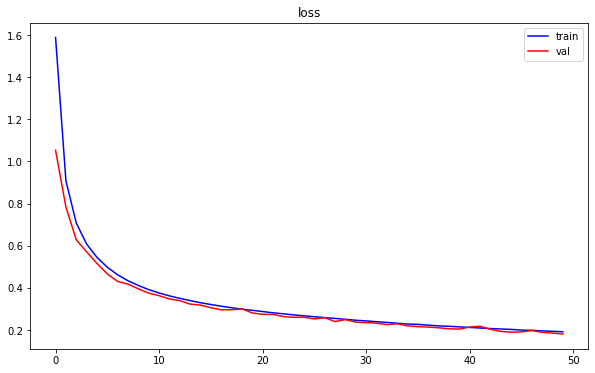

In [18]:
train_model(LeNet_model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)

In [19]:
LeNet_model.save('LeNet_5_ver2.h5')

In [18]:
from tensorflow import keras
loded_model =  keras.models.load_model('LeNet_5.h5')

In [59]:
a = loded_model(X_test[2].reshape(-1,28,28,3))
data = tf.argmax(np.array(a).reshape(-1))

data.numpy()

6

In [64]:
list = []
for i in range(len(y_test)):
    a = loded_model(X_test[i].reshape(-1,28,28,3))
    data = tf.argmax(np.array(a).reshape(-1))
    list.extend([data.numpy().tolist()])
    
list


[7,
 5,
 6,
 4,
 0,
 8,
 9,
 8,
 8,
 1,
 1,
 8,
 6,
 6,
 0,
 7,
 8,
 2,
 5,
 3,
 6,
 4,
 0,
 8,
 2,
 9,
 1,
 8,
 2,
 8,
 2,
 5,
 6,
 9,
 2,
 9,
 0,
 3,
 3,
 1,
 5,
 7,
 8,
 0,
 8,
 3,
 4,
 9,
 8,
 7,
 6,
 7,
 6,
 1,
 5,
 7,
 4,
 1,
 6,
 9,
 2,
 4,
 4,
 5,
 6,
 4,
 8,
 2,
 5,
 8,
 3,
 4,
 8,
 0,
 7,
 4,
 3,
 2,
 6,
 7,
 6,
 1,
 9,
 3,
 8,
 6,
 3,
 2,
 7,
 1,
 9,
 6,
 9,
 7,
 5,
 1,
 9,
 8,
 0,
 3,
 8,
 8,
 0,
 8,
 0,
 2,
 0,
 5,
 7,
 5,
 0,
 3,
 3,
 0,
 8,
 2,
 0,
 5,
 9,
 8,
 5,
 9,
 3,
 6,
 6,
 7,
 4,
 0,
 3,
 0,
 2,
 4,
 5,
 8,
 5,
 1,
 1,
 2,
 1,
 3,
 9,
 5,
 4,
 1,
 4,
 1,
 9,
 8,
 6,
 5,
 9,
 4,
 7,
 7,
 3,
 3,
 2,
 1,
 2,
 7,
 2,
 4,
 1,
 8,
 6,
 6,
 5,
 9,
 3,
 0,
 7,
 1,
 3,
 6,
 0,
 4,
 1,
 1,
 4,
 8,
 9,
 6,
 3,
 4,
 4,
 9,
 8,
 2,
 9,
 9,
 7,
 2,
 3,
 6,
 2,
 9,
 4,
 3,
 0,
 7,
 9,
 1,
 9,
 1,
 4,
 4,
 0,
 9,
 5,
 8,
 9,
 3,
 7,
 4,
 8,
 3,
 1,
 7,
 0,
 0,
 9,
 2,
 9,
 4,
 0,
 5,
 4,
 5,
 9,
 3,
 5,
 2,
 7,
 2,
 8,
 4,
 4,
 1,
 2,
 2,
 4,
 0,
 1,
 2,
 0,
 7,
 6,
 7,
 0,
 7,


In [65]:
y_test

array([9, 5, 6, ..., 0, 7, 1], dtype=uint8)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(list, y_test)

0.9475333333333333